In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
wineQ = pd.read_csv('wineQ.csv')

In [18]:
wineQ

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [32]:
#Первоначально Shapiro-Wilk тест можно применять только для небольших выборок (<=50). Но после того, как Ройстон предложил альтернативный метод вычисления вектора коэффициентов, предоставив алгоритм вычисления значений, который расширил размер выборки до 2000.

In [50]:
wineQ.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1599.0,800.000000,461.735855,1.00000,400.5000,800.00000,1199.500000,1599.00000
fixed.acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile.acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric.acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual.sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free.sulfur.dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total.sulfur.dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000


In [34]:
wineQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


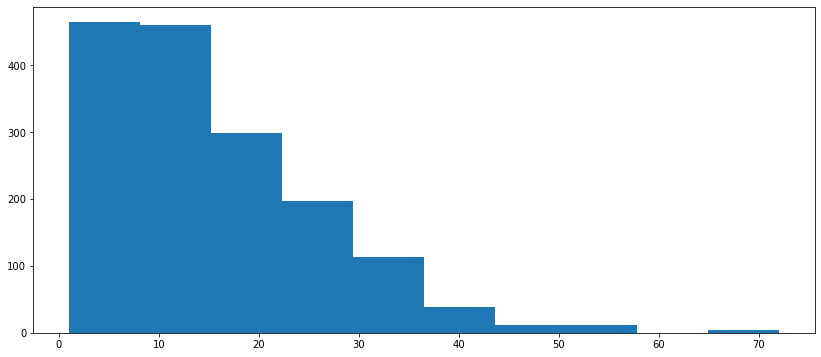

In [43]:
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(wineQ['free.sulfur.dioxide'])
pyplot.show()

In [44]:
from scipy.stats import shapiro

DataToTest = wineQ['free.sulfur.dioxide']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.90, p=0.000000000000000000000000000001
Not a normal distribution


Shapiro-Wilk test for normality: ShapiroResult(statistic=0.9018407464027405, pvalue=7.6973984391279615e-31)


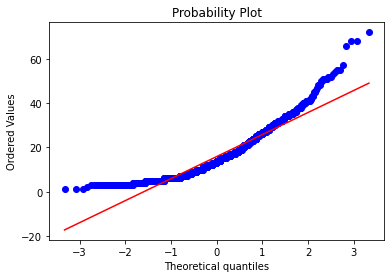

In [46]:
from scipy import stats

data = wineQ['free.sulfur.dioxide']
stats.probplot(data, dist="norm", plot=plt)
print("Shapiro-Wilk test for normality:", stats.shapiro(data))
plt.show()

In [47]:
# Давайте сгенерируем нормально распределенные данные из Python 
from numpy.random import randn
DataToTest = randn(100)

In [48]:
DataToTest

array([-0.26825   , -0.48566956, -0.68940831, -1.10115171, -0.54750547,
       -0.60329447, -0.28477813, -1.65614745,  0.18181517, -0.04158172,
       -0.09789254,  1.68706195, -1.30737167, -0.14617674, -1.22219393,
        1.20772052,  0.96993607, -0.45957079, -0.93418553, -2.16885805,
       -0.51837048, -0.22312061,  0.35177076, -0.08925545,  0.55150654,
       -0.77147366,  0.14148261,  0.01289396, -0.45392923,  0.06773413,
       -0.48184381, -1.35254644,  0.43591006, -2.01122875,  1.97006887,
        0.79713129,  0.0319065 ,  0.92684019, -0.53327174,  0.2730709 ,
        1.98670665,  0.82884638, -0.22845649,  1.14046727,  0.49919012,
       -0.00426415, -0.24206985,  0.58004136, -0.40147896, -0.14182077,
       -0.00661446,  0.00479841,  0.80938626, -0.50061767, -0.00390225,
       -0.7926374 ,  0.52452488,  1.48704245,  0.9270329 , -0.67881216,
       -0.55540013,  0.76331262,  0.21732437,  0.36785054,  0.79756411,
       -0.41036735,  1.57123375,  0.07259967, -0.77661435, -0.33

In [49]:
stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.99, p=0.742539644241333007812500000000
Normal distribution


In [ ]:
#Спасибо

In [ ]:
# When you add sulfite to wine, sulfur dioxide ionizes to the sulfite ion, SO3—, and bisulfite ion, HSO3—. A small fraction remains in the “molecular” form, SO2. It is this molecular form that protects the wine from spoilage organisms and oxidation.